In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from core.data import load_from_kaggle


In [7]:
dataset_link = "saurabhbadole/supermarket-data" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 7.15M/7.15M [00:01<00:00, 4.69MB/s]

Extracting files...


Loading dataset from C:\Users\Anna\.cache\kagglehub\datasets\saurabhbadole\supermarket-data\versions\1 to ../data/raw\supermarket-data
Moving file: C:\Users\Anna\.cache\kagglehub\datasets\saurabhbadole\supermarket-data\versions\1\supermarket_data.csv to c:\Anna-Project\notebooks\../data/raw\supermarket-data
Files moved to '../data/raw\supermarket-data' directory.


In [8]:
files

['supermarket_data.csv']

In [9]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom


In [10]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(541910, 8)

'Description'

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.68,1713.60,12346.00,13953.00,15152.00,16791.00,18287.0


'Duplicates'

np.int64(5268)

,Data Types,Missing Values,Unique Values,Sample Values
Invoice,object,0,25900,"[563731, 556926, 579777]"
StockCode,object,0,4070,"[22668, 22927, 22142]"
Description,object,1454,4223,"[BOTTLE BAG RETROSPOT , RED RETROSPOT CUP, SET..."
Quantity,int64,0,722,"[12, 4, 1]"
InvoiceDate,object,0,23260,"[16/11/11 13:54, 20/12/10 14:59, 12/12/10 10:11]"
Price,float64,0,1630,"[1.25, 1.25, 2.89]"
Customer ID,float64,135080,4372,"[15149.0, 16655.0, 14284.0]"
Country,object,0,38,"[United Kingdom, United Kingdom, United Kingdom]"


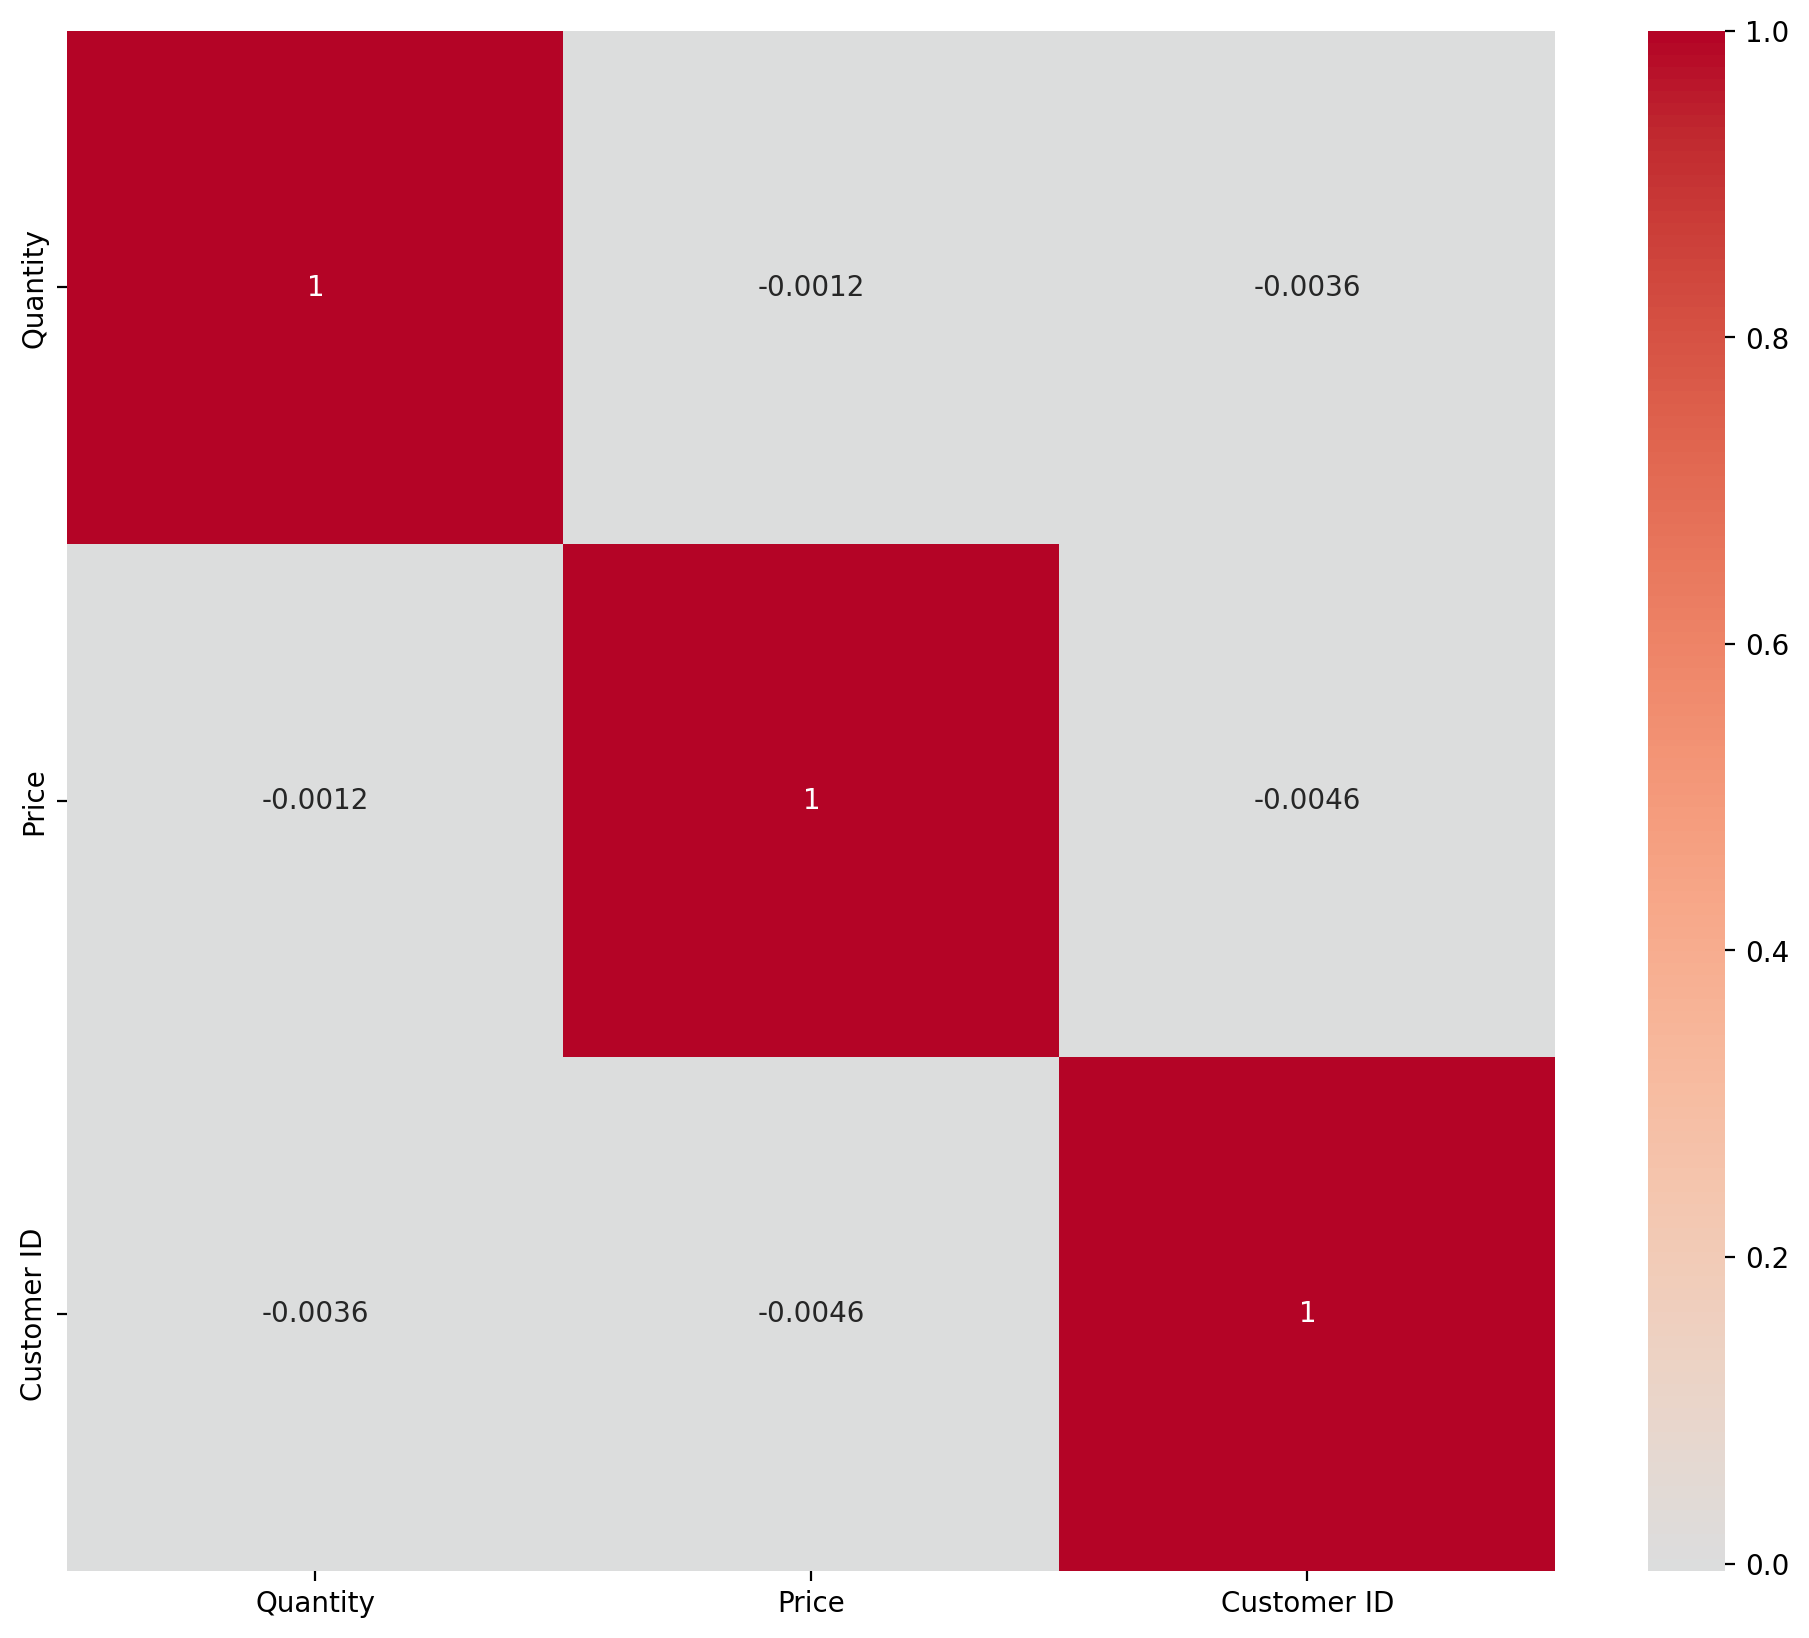

In [11]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);